In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = (mnist.data, mnist.target)
print(X.shape)

(70000, 784)


In [5]:
y = y.astype('int32')
print(y.dtype)

int32


## Exploracion de datos

<AxesSubplot:ylabel='Count'>

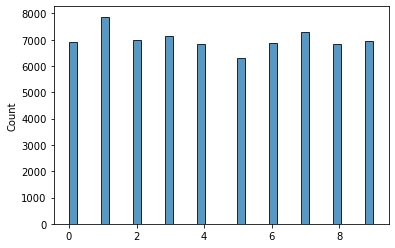

In [5]:
sns.histplot(data=y)

In [6]:
import visualization as vs

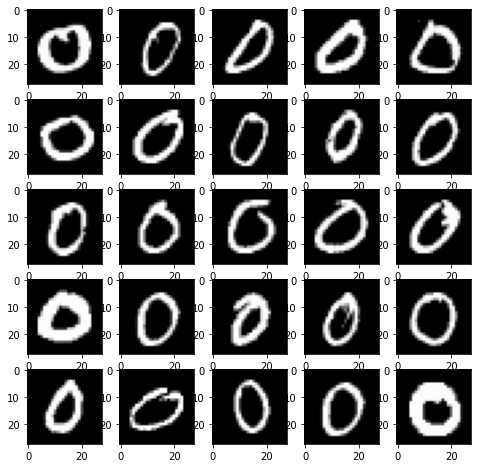

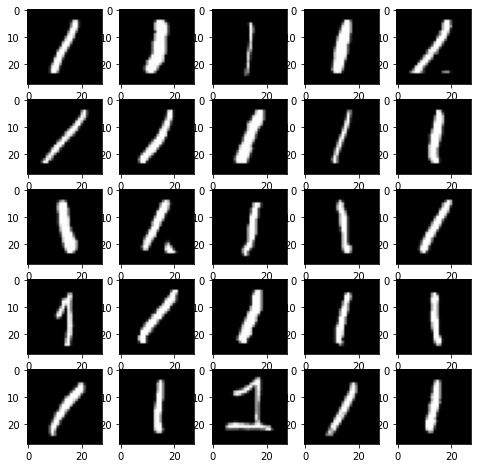

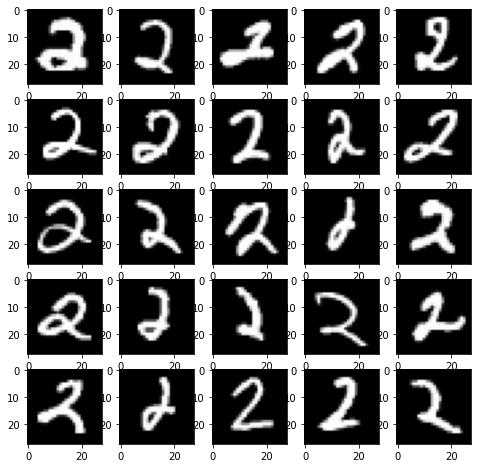

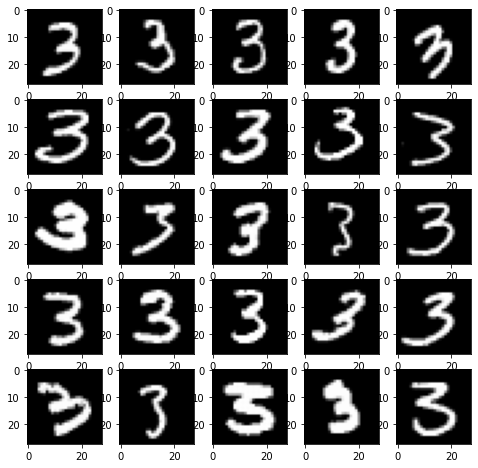

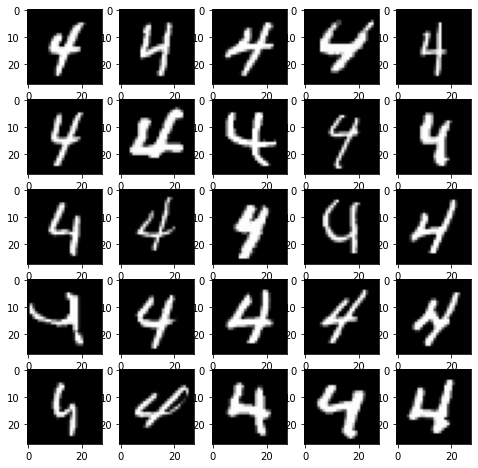

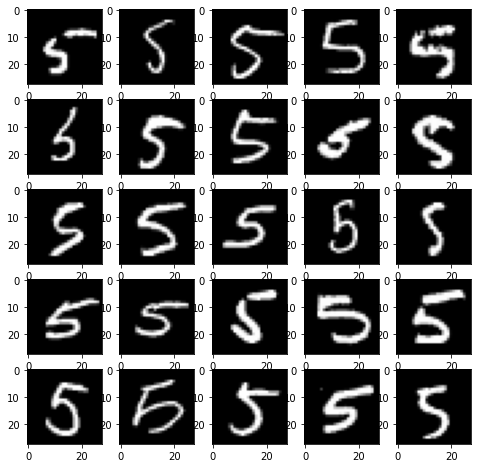

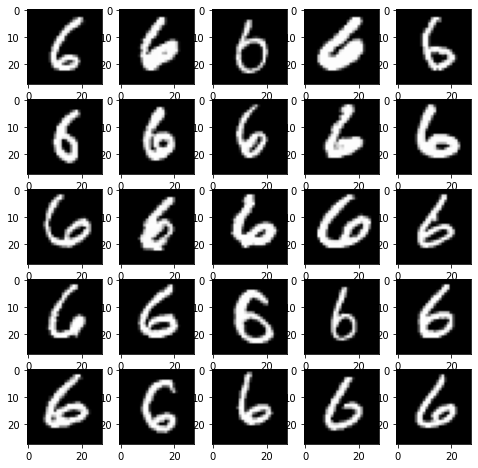

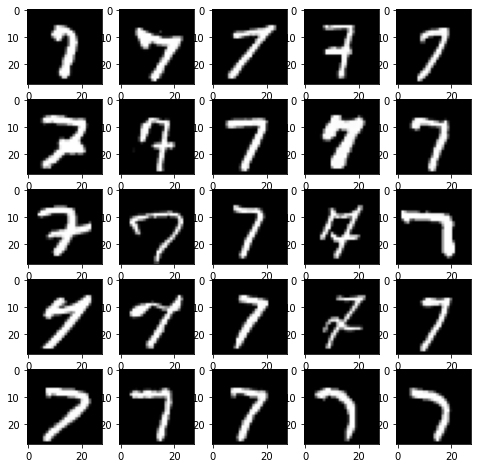

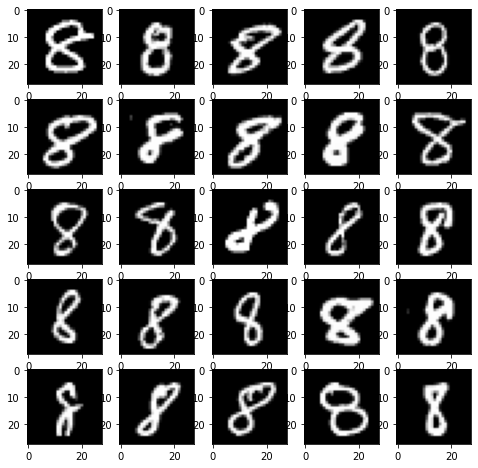

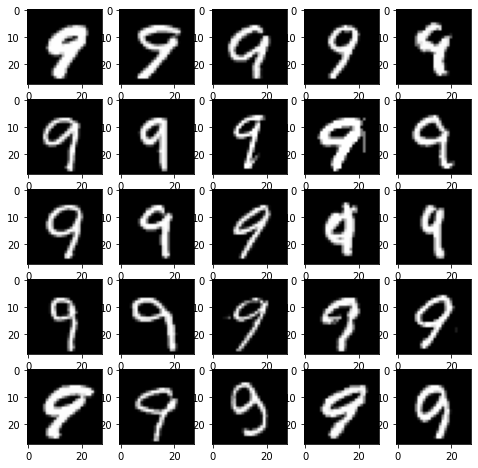

In [7]:
for i in range(10):
    vs.plot_digit_grid(X, y, i)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

## Modelo KNN, primera impresión

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs=-1)

print(f'Media: {scores.mean()}, std: {scores.std()}')

Media: 0.9668749601184682, std: 0.0016129410014770677


In [10]:
predictions = cross_val_predict(knn_clf, X_train, y_train, cv=3, n_jobs=-1)

In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(y_train, predictions)

0.966875

In [17]:
cm = metrics.confusion_matrix(y_train, predictions)

<AxesSubplot:>

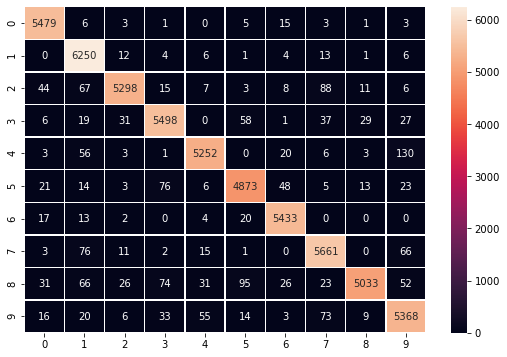

In [18]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)

In [19]:
norm_cm = cm.copy()

<AxesSubplot:>

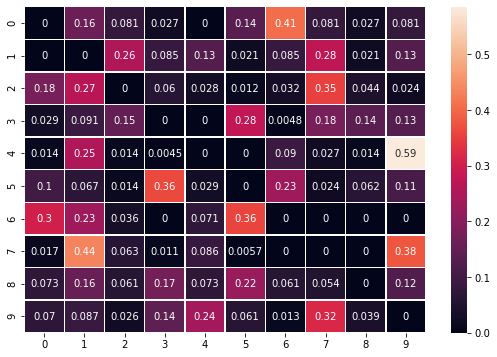

In [25]:
np.fill_diagonal(norm_cm, 0)
norm_cm = norm_cm / np.sum(norm_cm, axis=1, keepdims=True)

f2, ax2 = plt.subplots(figsize=(9, 6))
sns.heatmap(norm_cm, annot=True, linewidths=.5, ax=ax2)

## Optimización del modelo

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

search_dict = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [5, 7, 9, 13, 15, 20]
}

gs = GridSearchCV(KNeighborsClassifier()
                 , search_dict
                 , verbose=1
                 , cv=3
                 , n_jobs=-1)
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 224.9min finished


In [8]:
print(gs_result.best_score_)

0.9677321125426551
